# Import Packages

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score

# Dataset

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Credit Scoring with Logistic Regression and XGBoost.ipynb',
 'lc_2016_2017.csv',
 'lc_loan.csv',
 'loan - Copy.ipynb',
 'loan.ipynb',
 'new.html',
 'us-state-codes.csv']

In [3]:
data = pd.read_csv('lc_2016_2017.csv')

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\3315493078.py:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lc_2016_2017.csv')


In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [5]:
data.shape

(759338, 72)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

# Preprocessing Data

In [7]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [8]:
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default']),1,0)

In [9]:
data.good_bad.value_counts()

good_bad
0    702875
1     56463
Name: count, dtype: int64

In [10]:
data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


In [11]:
data.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In [12]:
mapping_home_ownership = {'MORTGAGE': 0, 'OWN': 0, 'RENT': 1, 'ANY': 1, 'NONE': 1}
data['home_ownership_new'] = data['home_ownership'].map(mapping_home_ownership)

In [13]:
data.home_ownership_new.value_counts()

home_ownership_new
0    461730
1    297608
Name: count, dtype: int64

In [14]:
data[['home_ownership', 'home_ownership_new']]

,home_ownership,home_ownership_new
0,OWN,0
1,MORTGAGE,0
2,MORTGAGE,0
3,RENT,1
4,MORTGAGE,0
...,...,...
759333,OWN,0
759334,RENT,1
759335,RENT,1
759336,MORTGAGE,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [16]:
missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0]>0.5] #Mencari kolom yang memiliki missing value melebihi 50%
missing_values.sort_values([0], ascending = False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


Missing value threshold digunakan untuk mengidentifikasi dan menghapus kolom atau baris yang memiliki jumlah nilai yang hilang melebihi ambang tertentu. Jika jumlah nilai yang hilang dalam suatu kolom atau baris melebihi threshold yang ditentukan, maka kolom atau baris tersebut dianggap tidak memenuhi syarat dan dapat dihapus. Dalam kasus ini menggunakan threshold sebesar 50%

In [17]:
#Menghapus kolom yang memiliki missing value lebih dari 50%
data.dropna(thresh = data.shape[0]*0.5, axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 67 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          759338 non-null  int64  
 1   loan_amnt                   759338 non-null  int64  
 2   funded_amnt                 759338 non-null  int64  
 3   funded_amnt_inv             759338 non-null  float64
 4   term                        759338 non-null  object 
 5   int_rate                    759338 non-null  float64
 6   installment                 759338 non-null  float64
 7   grade                       759338 non-null  object 
 8   sub_grade                   759338 non-null  object 
 9   emp_title                   708368 non-null  object 
 10  emp_length                  708975 non-null  object 
 11  home_ownership              759338 non-null  object 
 12  annual_inc                  759338 non-null  float64
 13  verification_s

In [19]:
#Check missing value yang tidak memenuhi threshold
missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0]>0.5]
missing_values.sort_values([0], ascending = False)

,0


In [20]:
data.shape

(759338, 67)

In [21]:
#Split data
X = data.drop('good_bad', axis=1)
y = data['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
#stratify = y agar ytrain dan ytest memiliki distribusi yang sama
#random state untuk membuat baris yang random itu2 aja

In [22]:
X_train.shape, X_test.shape

((607470, 66), (151868, 66))

In [23]:
y_train.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

good_bad
0    0.925639
1    0.074361
Name: proportion, dtype: float64

In [25]:
X_train.shape

(607470, 66)

In [26]:
for col in X_train.select_dtypes(include= ['object', 'bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

['ND' 'NY' 'UT' 'FL' 'IL' 'TX' 'PA' 'GA' 'VA' 'WI' 'OH' 'ID' 'CA' 'MO'
 'IN' 'NJ' 'SC' 'MI' 'CT' 'NM' 'TN' 'AZ' 'MN' 'WA' 'LA' 'CO' 'KS' 'MA'
 'NV' 'MD' 'OR' 'AL' 'NC' 'MS' 'OK' 'VT' 'DC' 'KY' 'AR' 'ME' 'DE' 'NE'
 'NH' 'WY' 'HI' 'AK' 'SD' 'MT' 'RI' 'WV']

earliest_cr_line
['Aug-1994' 'Sep-2001' 'May-1999' 'Jun-2005' 'Jan-2012' 'Jan-2001'
 'Aug-1991' 'Feb-2006' 'Oct-1989' 'Oct-2000' 'Jun-2001' 'Dec-1993'
 'May-1989' 'Sep-2006' 'Sep-1997' 'Sep-2003' 'May-1982' 'Dec-1996'
 'Jun-1999' 'Oct-2003' 'Sep-2008' 'May-1994' 'Sep-2004' 'Jul-2007'
 'Feb-2008' 'Aug-1985' 'Aug-2002' 'Nov-1998' 'Mar-2012' 'Feb-1993'
 'Aug-2001' 'May-1987' 'Mar-2004' 'Mar-1978' 'Apr-1996' 'Oct-1995'
 'May-2006' 'Oct-2012' 'Dec-2001' 'Jul-2001' 'May-2004' 'Feb-2005'
 'Jul-1995' 'May-2007' 'Feb-2004' 'Feb-2001' 'Jul-2004' 'Sep-1998'
 'Jul-2006' 'Sep-1993' 'Jun-2012' 'Jul-2005' 'Jun-2011' 'Nov-2006'
 'Nov-2002' 'Jan-1996' 'Jul-2003' 'Sep-2007' 'Aug-1999' 'Feb-1994'
 'Apr-2003' 'Aug-2004' 'Oct-2013' 'Dec-2002' 'May-2012' '

['Individual' 'Joint App']



In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 67 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          759338 non-null  int64  
 1   loan_amnt                   759338 non-null  int64  
 2   funded_amnt                 759338 non-null  int64  
 3   funded_amnt_inv             759338 non-null  float64
 4   term                        759338 non-null  object 
 5   int_rate                    759338 non-null  float64
 6   installment                 759338 non-null  float64
 7   grade                       759338 non-null  object 
 8   sub_grade                   759338 non-null  object 
 9   emp_title                   708368 non-null  object 
 10  emp_length                  708975 non-null  object 
 11  home_ownership              759338 non-null  object 
 12  annual_inc                  759338 non-null  float64
 13  verification_s

In [28]:
col_not_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [29]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [30]:
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [31]:
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [32]:
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [33]:
# Mengubah tipe data kolom 'emp_length' menjadi int dan menghapus string satuan
X_train['emp_length'] = X_train['emp_length'].str.replace('10+', str(10))
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

# Mengonversi tipe data kolom 'emp_length' 
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

# Mengisi nilai yang hilang dengan 0
X_train['emp_length'].fillna(value=0, inplace=True)

In [34]:
X_train['emp_length'].unique()

array([ 4., 10.,  0.,  5.,  6.,  7.,  2.,  3.,  8.,  1.,  9.])

In [35]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [36]:
#Mengubah kolom 'issue_d' menjadi tipe data datetime
X_train['issue_d']=pd.to_datetime(X_train['issue_d'])
#Mengubah kolom-kolom lain yang terdapat dalam col_date menjadi tipe data datetime
for col in col_date:
    X_train[col]=pd.to_datetime(X_train[col])

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2972597085.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train['issue_d']=pd.to_datetime(X_train['issue_d'])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2972597085.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col]=pd.to_datetime(X_train[col])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2972597085.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col]=pd.to_datetime(X_train[col])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2972597085.py:5: UserWarning: Could n

In [37]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [38]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('10+', str(10))
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date:
    X_test[col]=pd.to_datetime(X_test[col])

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2416043926.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col]=pd.to_datetime(X_test[col])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2416043926.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col]=pd.to_datetime(X_test[col])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2416043926.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col]=pd.to_datetime(X_test[col])
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_9420\2416043926.py:12: UserWarning: Could not infer forma

In [39]:
X_test[col_not_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 66), (607470,), (151868, 66), (151868,))

In [41]:
col_already_clean = col_not_clean + ['home_ownership_new']

In [42]:
col_already_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'home_ownership_new']

In [43]:
X_train = X_train[col_already_clean]
X_test = X_test[col_already_clean]

In [44]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [45]:
X_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,home_ownership_new
147577,36,4.0,2017-02-01,1994-08-01,2017-12-01,2017-12-01,0
505776,36,10.0,2016-04-01,2001-09-01,2017-07-01,2017-11-01,1
412425,36,0.0,2017-07-01,1999-05-01,2017-12-01,2017-12-01,1
618730,36,5.0,2016-10-01,2005-06-01,2017-12-01,2017-12-01,1
111143,36,6.0,2017-03-01,2012-01-01,2017-12-01,2017-12-01,1
...,...,...,...,...,...,...,...
150426,36,8.0,2017-02-01,1998-11-01,2017-11-01,2017-12-01,0
195135,36,0.0,2017-01-01,1993-09-01,2017-12-01,2017-12-01,1
182511,36,10.0,2017-01-01,1988-03-01,2017-12-01,2017-12-01,0
82596,36,3.0,2017-04-01,2003-01-01,2017-12-01,2017-12-01,0


In [46]:
from datetime import date
date.today().strftime('%Y-%m-%d')
pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-02-01')

Timedelta('2626 days 00:00:00')

In [47]:
X_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,home_ownership_new
147577,36,4.0,2017-02-01,1994-08-01,2017-12-01,2017-12-01,0
505776,36,10.0,2016-04-01,2001-09-01,2017-07-01,2017-11-01,1
412425,36,0.0,2017-07-01,1999-05-01,2017-12-01,2017-12-01,1
618730,36,5.0,2016-10-01,2005-06-01,2017-12-01,2017-12-01,1
111143,36,6.0,2017-03-01,2012-01-01,2017-12-01,2017-12-01,1
...,...,...,...,...,...,...,...
150426,36,8.0,2017-02-01,1998-11-01,2017-11-01,2017-12-01,0
195135,36,0.0,2017-01-01,1993-09-01,2017-12-01,2017-12-01,1
182511,36,10.0,2017-01-01,1988-03-01,2017-12-01,2017-12-01,0
82596,36,3.0,2017-04-01,2003-01-01,2017-12-01,2017-12-01,0


In [48]:
def date_columns(df, column):
    today = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = '%b-%y')
    df['mths_since_' + column] = round(pd.to_numeric((today - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)
    
date_columns(X_train, 'issue_d')
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [49]:
X_train

,term,emp_length,home_ownership_new,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4.0,0,85.0,350.0,75.0,75.0
505776,36,10.0,1,95.0,266.0,80.0,76.0
412425,36,0.0,1,80.0,294.0,75.0,75.0
618730,36,5.0,1,89.0,222.0,75.0,75.0
111143,36,6.0,1,84.0,145.0,75.0,75.0
...,...,...,...,...,...,...,...
150426,36,8.0,0,85.0,300.0,76.0,75.0
195135,36,0.0,1,86.0,361.0,75.0,75.0
182511,36,10.0,0,86.0,425.0,75.0,75.0
82596,36,3.0,0,83.0,251.0,75.0,75.0


In [50]:
date_columns(X_test, 'issue_d')
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [51]:
X_test.isnull().sum()

term                               0
emp_length                         0
home_ownership_new                 0
mths_since_issue_d                 0
mths_since_earliest_cr_line        0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [52]:
X_train.isnull().sum()

term                               0
emp_length                         0
home_ownership_new                 0
mths_since_issue_d                 0
mths_since_earliest_cr_line        0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [53]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [54]:
X_test.isnull().sum()
X_train.isnull().sum()

term                             0
emp_length                       0
home_ownership_new               0
mths_since_issue_d               0
mths_since_earliest_cr_line      0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [55]:
X_test.isnull().sum()

term                             0
emp_length                       0
home_ownership_new               0
mths_since_issue_d               0
mths_since_earliest_cr_line      0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

# Model

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

E:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [60]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

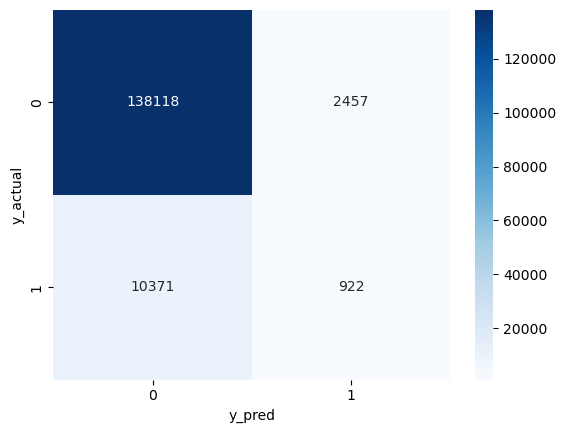

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.show()

In [62]:
cm

array([[138118,   2457],
       [ 10371,    922]], dtype=int64)

In [63]:
y_train.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

In [64]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.2728617934300089


In [59]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5320826407473487


In [65]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_pred = model.predict_proba(X_test)[:, 1]

In [67]:
y_pred

array([0.33114836, 0.04725634, 0.00531089, ..., 0.0021198 , 0.05205048,
       0.04778331])

In [68]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

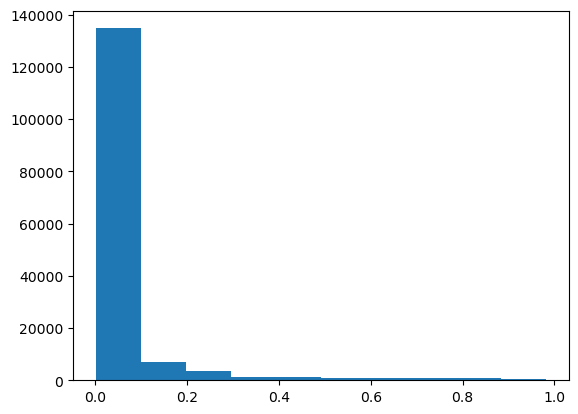

In [69]:
plt.hist(y_pred);

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [71]:
# youden j-stat
j = tpr - fpr

ix = np.argmax(j)
best_thresh = thresholds[ix]
best_thresh

0.06560512306550302

In [72]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.06644903354156552).astype(int)

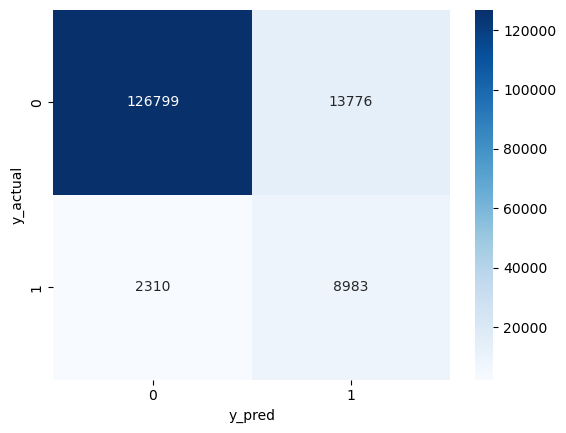

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.show()

In [74]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8487254988497027


In [75]:
model.coef_

array([[ 1.08820247e-02, -1.00287536e-02,  5.25028678e-01,
         3.11050363e-03,  1.07387512e-04,  2.89216502e-01,
        -3.00907858e-01]])

In [76]:
X_train.head()

,term,emp_length,home_ownership_new,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4.0,0,85.0,350.0,75.0,75.0
505776,36,10.0,1,95.0,266.0,80.0,76.0
412425,36,0.0,1,80.0,294.0,75.0,75.0
618730,36,5.0,1,89.0,222.0,75.0,75.0
111143,36,6.0,1,84.0,145.0,75.0,75.0


In [77]:
model.intercept_

array([-3.24541615])

In [78]:
df_coeff = pd.DataFrame(model.coef_, columns = X_train.columns)
df_coeff

,term,emp_length,home_ownership_new,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.010882,-0.010029,0.525029,0.003111,0.000107,0.289217,-0.300908


Formula Regresi Logistik pada permasalahan ini adalah
y= 1/(1 + e^-{-3.24541615+0.010882x1-0.010029x2+0.525029x3+0.003111x4+0.000107x5+0.289217x6-0.300908x7})